# DIGIT MNIST Classification Ensemble(KOR, ENG)

Today I learning about CNN Ensemble(Bagging). It is very amazting performance about accuracy.
</br>
**Ensemble(Bagging) technique is a method of solving a diffcult problem using the collective intelligence of several people rather than one expert.**</br>
(but i think this model is Geneius of several people!!)
</br>
**This NoteBook Guideline is easy to understand for anyone. I hope it helps many people.**
</br>
I will also add the link referenced below, so it will be more useful if you check it out!
</br>
**If you have any question. plz comment!! and Don't forget Upvote!**
<hr>
금일 CNN을 앙상블 기법의 적용원리에 대하여 학습하였습니다.</br>이 Notebook은 쉽게 이해할 수 있게 작성되어 있으며,
개인적인 바램이지만, 많은 사람들이 쉽게 이해하였으면 좋겠습니다.</br>
추가로 하단에 참조했으면 하는 링크를 달아두었으니, 내용을 확인하시면 조금 더 도움될 것입니다.

# Contents
- **Load Data and Preprocessing Data**
- **Check Values Count**
- **Create Model**
- **Learning Ensemble(Very Importance)**
- **Reference Link**
- **Visualization about Loss and Accuracy**

# Load Data and Preprocessing Data
- **train_data compose label and pixel value.**
    - **train_data Pixel be transformation of 28*28**
    - **Pixel value normalization**
    - **label data drop and make train_label**
        - **(KOR) 28*28 사이즈로 변형 및 정규화 과정을 거치며, label 셋을 따로 만들어 줍니다.**
</br>
</br>
- **test_data**
    - **Pixel be transformation of 28*28**
    - **Pixel value normalization**    
        - **(KOR) 28*28 사이즈로 변환만 해주면 됩니다.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Activation, Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.layers import Flatten, MaxPooling2D, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings(action='ignore')
%matplotlib inline

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

train_label = train_df['label']
train_label = to_categorical(train_label)
train_data = (train_df.iloc[:, 1:].values.astype('float32') / 255.0 ).reshape(-1, 28, 28, 1)
test_data = (test_df.iloc[:,:].values.astype('float32') / 255.0 ).reshape(-1, 28, 28, 1)

print('train_df shape : ',train_data.shape, 'train_label : ',train_label.shape, 'test_data : ',test_data.shape)

C:\Users\c\.conda\envs\wongi\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


train_df shape :  (42000, 28, 28, 1) train_label :  (42000, 10) test_data :  (28000, 28, 28, 1)


# Check values count
- **Let's Check evenly the distribution of the label data**

<AxesSubplot:>

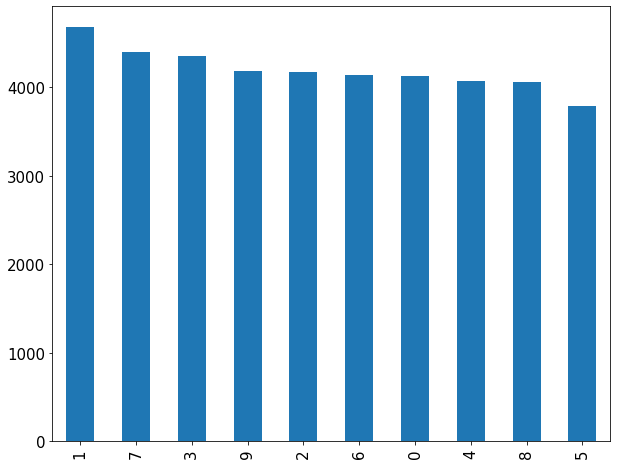

In [2]:
count = pd.value_counts(train_df['label'].values)
count.plot.bar(figsize=(10,8), fontsize=15)

# Create Ensemble Model
- Please note that I will comment below Code!!!

In [3]:
# Build CNN(Convolutional Neural Network)
optimizer = RMSprop(learning_rate=0.0025,
                    rho=0.9,
                    momentum=0.1,
                    epsilon=1e-07,
                    centered=True,
                    name='RMSprop')

nets = 15                # Number of Reapeat
model = [0] *nets        # Making Ensemble Model List


for i in range(nets):
    model[i] = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        
        tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        
        tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),

        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3,3), padding='same'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        
        tf.keras.layers.Conv2D(128, (3,3), padding='same'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        
        tf.keras.layers.Conv2D(128, (3,3), padding='same'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),

        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),    

        tf.keras.layers.Conv2D(256, (3,3), padding='same'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),
        
        tf.keras.layers.Conv2D(256, (3,3), padding='same'),
        tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
        tf.keras.layers.LeakyReLU(alpha=0.1),

        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256),
        tf.keras.layers.LeakyReLU(alpha=0.1),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model[i].compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# if you want see model summary()
# model.summary()

# Learning Ensemble for Bagging
<img src = 'https://blog.kakaocdn.net/dn/PC6mD/btrh2i38SMg/VtEFCCGAyvknFrTVkZQ76K/img.webp'></src>

In [4]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

history = [0] * nets
epochs = 45
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(train_data, train_label, test_size = 0.1, stratify = train_label)
    
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 1: Epochs=45, Train accuracy=0.99836, Validation accuracy=0.99643
CNN 2: Epochs=45, Train accuracy=0.99825, Validation accuracy=0.99690
CNN 3: Epochs=45, Train accuracy=0.99836, Validation accuracy=0.99643
CNN 4: Epochs=45, Train accuracy=0.99812, Validation accuracy=0.99690
CNN 5: Epochs=45, Train accuracy=0.99836, Validation accuracy=0.99690
CNN 6: Epochs=45, Train accuracy=0.99828, Validation accuracy=0.99738
CNN 7: Epochs=45, Train accuracy=0.99809, Validation accuracy=0.99595
CNN 8: Epochs=45, Train accuracy=0.99809, Validation accuracy=0.99643
CNN 9: Epochs=45, Train accuracy=0.99836, Validation accuracy=0.99595
CNN 10: Epochs=45, Train accuracy=0.99838, Validation accuracy=0.99762
CNN 11: Epochs=45, Train accuracy=0.99830, Validation accuracy=0.99619
CNN 12: Epochs=45, Train accuracy=0.99830, Validation accuracy=0.99714
CNN 13: Epochs=45, Train accuracy=0.99828, Validation accuracy=0.99714
CNN 14: Epochs=45, Train accuracy=0.99833, Validation accuracy=0.99571
CNN 15: Epochs=

# Visualization about Loss and Accuracy

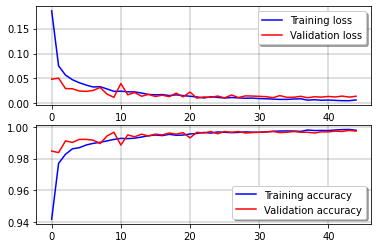

In [6]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history[14].history['loss'], color='b', label="Training loss")
ax[0].plot(history[14].history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history[14].history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history[14].history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

In [7]:
# ENSEMBLE PREDICTIONS AND SUBMIT
results = np.zeros( (test_data.shape[0],10) ) 
for j in range(nets):
    results = results + model[j].predict(test_data)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)

# Reference Link
<hr>
   - It's very useful kernel!!(I recommand below kernel)
   
- reference link : https://www.kaggle.com/benanakca/kannada-mnist-cnn-tutorial-with-app-top-2
- reference link : https://www.kaggle.com/cdeotte/25-million-images-0-99757-mnist/notebook
